In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('DeepLatentMicrobiome/Src/')
from layers import *
from data import *
from train import *

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [3]:
auto, encoder_bioma, encoder_domain, decoder_bioma = autoencoder(domain_shape = None)

In [4]:
for layer in auto.layers:
    # Print the layer name
    print("Layer name:", layer.name)
    # Print the input shape of the layer
    print("Input shape:", layer.input_shape)
    # Print the output shape of the layer
    print("Output shape:", layer.output_shape)
    # Print the activation function of the layer
    try: 
        print("Activation function:", layer.activation.__name__)
    except:
        print("not activation")
    # Print the number of weights and biases of the layer
    try: 
        print("Number of weights:", len(layer.get_weights()[0]))
    except:
        print("no weights")
    try: 
        print("Number of biases:", len(layer.get_weights()[1]))
    except:
        print("no weights")
    # Print a blank line for readability
    print()

Layer name: bioma_input_717
Input shape: [(None, 717)]
Output shape: [(None, 717)]
not activation
no weights
no weights

Layer name: center_log_ratio
Input shape: (None, 717)
Output shape: (None, 717)
not activation
no weights
no weights

Layer name: encoder_bioma_dense_128
Input shape: (None, 717)
Output shape: (None, 128)
not activation
Number of weights: 717
Number of biases: 128

Layer name: encoder_bioma_dense_64
Input shape: (None, 128)
Output shape: (None, 64)
not activation
Number of weights: 128
Number of biases: 64

Layer name: encoded_bioma_10
Input shape: (None, 64)
Output shape: (None, 10)
Activation function: tanh
Number of weights: 64
Number of biases: 10

Layer name: decoder_dense_64
Input shape: (None, 10)
Output shape: (None, 64)
not activation
Number of weights: 10
Number of biases: 64

Layer name: decoder_dense_128
Input shape: (None, 64)
Output shape: (None, 128)
not activation
Number of weights: 64
Number of biases: 128

Layer name: decoded_bioma
Input shape: (Non

In [5]:
encoder_bioma.summary()

Model: "EncoderBioma"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bioma_input_717 (InputLayer  [(None, 717)]            0         
 )                                                               
                                                                 
 center_log_ratio (CenterLog  (None, 717)              0         
 Ratio)                                                          
                                                                 
 encoder_bioma_dense_128 (De  (None, 128)              91904     
 nse)                                                            
                                                                 
 encoder_bioma_dense_64 (Den  (None, 64)               8256      
 se)                                                             
                                                                 
 encoded_bioma_10 (Dense)    (None, 10)               

In [40]:
otu_size = 717
latent_size = 10
hidden_layers = [128, 64]
encoder = keras.Sequential([
    CenterLogRatio(),
    layers.Dense(128,  name = "encode_128", activation = layers.ReLU()),
    layers.Dense(64, name = "encode_64", activation = layers.ReLU()),
    layers.Dense(10, activation = layers.ReLU(), name = "encode_10")
], name = "encoder")
decoder = keras.Sequential([
    layers.Dense(64, input_shape = (10,),name = "decode_64", activation = layers.ReLU()),
    layers.Dense(128,  name = "decode_128", activation = layers.ReLU()),
    layers.Dense(717, activation = 'linear', name = "decode_717")
], name = "decoder")
input_layer = layers.Input(shape = (otu_size,), name = "input_layer")
latent_vector = encoder(input_layer)
output = decoder(latent_vector)


In [41]:
model = keras.Model(inputs = input_layer, outputs = output)
model.compile("adam", loss = "mean_squared_error")
model.summary(expand_nested = True)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 717)]             0         
                                                                 


 encoder (Sequential)        (None, 10)                100810    
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| center_log_ratio (CenterLog  (None, 717)            0         |
| Ratio)                                                        |
|                                                               |
| encode_128 (Dense)        (None, 128)               91904     |
|                                                               |
| encode_64 (Dense)         (None, 64)                8256      |
|                                                               |
| encode_10 (Dense)         (None, 10)                650       |
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
 decoder (Sequential)        (None, 717)               101517    
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| decode_64 (Dense)         (None, 64)                704       |
|                                                               |
| decode_1

In [42]:
X_train, X_test, __, __, otu_columns, __ = read_data(otu_filename = 'DeepLatentMicrobiome/Datasets/otu_table_all_80.csv', 
metadata_filename = 'DeepLatentMicrobiome/Datasets/metadata_table_all_80.csv')

In [43]:
model.fit(X_train, X_train, epochs = 100, batch_size=64)

Epoch 1/100
67/67 [==============================] - 1s 11ms/step - loss: 376490.8438
Epoch 2/100
67/67 [==============================] - 1s 9ms/step - loss: 291553.8750
Epoch 3/100
67/67 [==============================] - 1s 12ms/step - loss: 216234.0000
Epoch 4/100
67/67 [==============================] - 1s 9ms/step - loss: 186120.8906
Epoch 5/100
67/67 [==============================] - 1s 9ms/step - loss: 173758.5156
Epoch 6/100
67/67 [==============================] - 1s 8ms/step - loss: 163762.5156
Epoch 7/100
67/67 [==============================] - 1s 8ms/step - loss: 156947.7188
Epoch 8/100
67/67 [==============================] - 1s 8ms/step - loss: 148793.7500
Epoch 9/100
67/67 [==============================] - 1s 9ms/step - loss: 134350.1094
Epoch 10/100
67/67 [==============================] - 1s 11ms/step - loss: 127232.0625
Epoch 11/100
67/67 [==============================] - 1s 9ms/step - loss: 120584.4844
Epoch 12/100
67/67 [==============================] - 1s 9ms

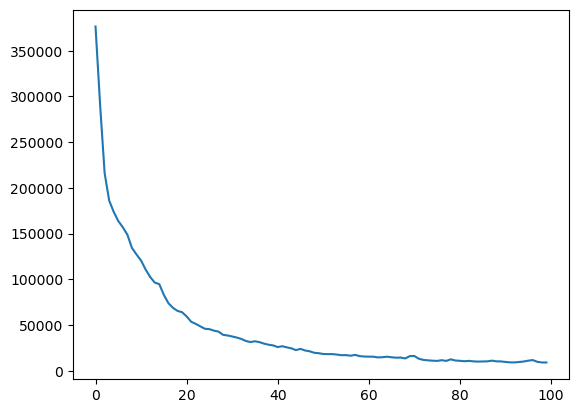

In [44]:

plt.plot(range(0,100),model.history.history['loss'])

In [45]:
predicted_test = model.layers[1].predict(X_test)
predicted_train = model.layers[1].predict(X_train)


133/133 [==============================] - 0s 3ms/step


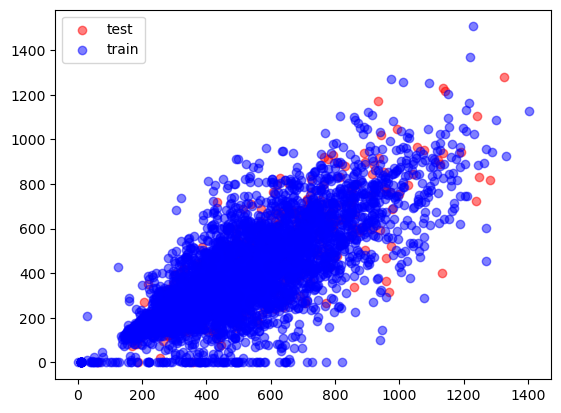

In [61]:
plt.scatter(predicted_test[:,2],predicted_test[:,0],color='r', alpha=0.5)
plt.scatter(predicted_train[:,2],predicted_train[:,0],color='b', alpha=0.5)
plt.legend(["test","train"])

(array([   0.,    0.,    0.,    0.,    0., 4251.,    0.,    0.,    0.,
           0.]),
 array([-0.5       , -0.40000001, -0.30000001, -0.2       , -0.1       ,
         0.        ,  0.1       ,  0.2       ,  0.30000001,  0.40000001,
         0.5       ]),
 <BarContainer object of 10 artists>)

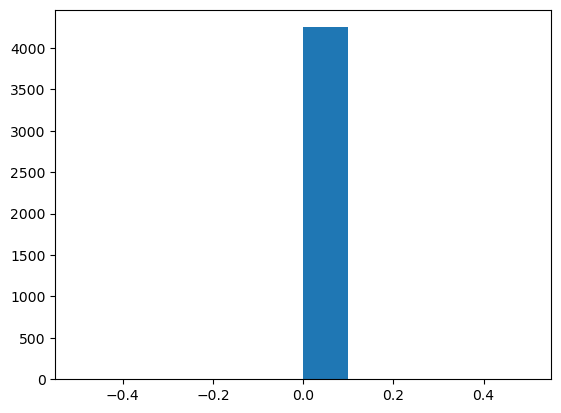

In [62]:
plt.hist(predicted_train[:,1])